# Import neccessary python modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# setting graphs to show in jupyter
%matplotlib inline
# to set seaborn graphs for better style
sns.set(style='ticks')

# Importing the neccessary data files using pandas dataframe

In [2]:
Customer_Aq= pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 2 - Credit Card Case Study-Ajay/Customer Acqusition.csv')
Spend=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 2 - Credit Card Case Study-Ajay/Spend.csv')
Repayment=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 2 - Credit Card Case Study-Ajay/Repayment.csv')

In [4]:
Customer_Aq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


# 1. In above dataset
# a) In case age is less than 18, replace it with mean of age values.

In [5]:
age_mean=Customer_Aq.Age.mean()
Customer_Aq.Age=Customer_Aq.Age.where(Customer_Aq.Age >=18, other =age_mean)
Customer_Aq.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


In [6]:
Spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [13]:
Spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [15]:
# Droping the Sr. no column from the Spend dataframe
Spend.drop('Sl No:', axis=1, inplace=True)

In [18]:
# Changing the Month column from object to daatetime
Spend.Month=pd.to_datetime(Spend.Month, '%y-%m-%d')

In [22]:
Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [24]:
# Dropping the no column from customer acqusition dataframe
Customer_Aq.drop('No', axis=1, inplace=True)

# 1. b) In case spend amount is more than the limit, replace it with 50% of that customer's limit.
(customer's limit provided in acqusition table is the per transaction limit on his card)

In [25]:
Cust_Spend=pd.merge(Customer_Aq, Spend, how='left', on='Customer')

In [26]:
Cust_Spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [27]:
Cust_Spend.Amount= Cust_Spend.Amount.where(Cust_Spend.Amount <Cust_Spend.Limit, other=Cust_Spend.Limit/2)

In [31]:
Cust_Spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


# 1. c) In case the repayment amount is more than the limit, replace the repayment with the limit.

In [33]:
# dropping the SL no column and unnamed: 4 column
Repayment.drop(['SL No:','Unnamed: 4'], axis=1, inplace=True)

In [35]:
Repayment.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [36]:
# removing the rows with null values
Repayment.dropna(axis=0, inplace=True)

In [37]:
Repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [46]:
# renaming the columns amount and month in repayment dataframe
Repayment.rename(columns={'Month':'Month_repay','Amount':'Amount_repay'}, inplace=True)

In [48]:
# merging the Cust_spend and repayment dataframe
Cust_spend_repay=pd.merge(Cust_Spend, Repayment, how='left', on='Customer')

In [49]:
Cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Month_repay,Amount_repay
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,17-Jan-05,165972.88


In [54]:
Cust_spend_repay.Amount_repay=Cust_spend_repay.Amount_repay.where((Cust_spend_repay.Amount_repay<Cust_spend_repay.Limit), other=Cust_spend_repay.Limit)

In [55]:
Cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Month_repay,Amount_repay
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,17-Jan-05,165972.88


# 2. From Above dataset create the following summaries:

# A. How many distinct customers exist?

In [61]:
Customer_Aq.Customer.nunique()

100

# B. How Many distinct categories exist?

In [62]:
Customer_Aq.Product.nunique()

3

# C. What is the average monthly spend by customers?

In [65]:
Cust_spend_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      37284 non-null  object        
 1   Age           37284 non-null  float64       
 2   City          37284 non-null  object        
 3   Product       37284 non-null  object        
 4   Limit         37284 non-null  float64       
 5   Company       37284 non-null  object        
 6   Segment       37284 non-null  object        
 7   Month         37284 non-null  datetime64[ns]
 8   Type          37284 non-null  object        
 9   Amount        37284 non-null  float64       
 10  Month_repay   37284 non-null  object        
 11  Amount_repay  37284 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 3.4+ MB


In [66]:
Cust_spend_repay['Month_No']=Cust_spend_repay.Month.apply(lambda x: x.month)

In [70]:
Cust_spend_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      37284 non-null  object        
 1   Age           37284 non-null  float64       
 2   City          37284 non-null  object        
 3   Product       37284 non-null  object        
 4   Limit         37284 non-null  float64       
 5   Company       37284 non-null  object        
 6   Segment       37284 non-null  object        
 7   Month         37284 non-null  datetime64[ns]
 8   Type          37284 non-null  object        
 9   Amount        37284 non-null  float64       
 10  Month_repay   37284 non-null  object        
 11  Amount_repay  37284 non-null  float64       
 12  Month_No      37284 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 3.7+ MB


In [73]:
monthly_spend=Cust_spend_repay.groupby(['Customer','Month_No'])[['Amount']].mean().reset_index()

In [75]:
monthly_spend.head()

,Customer,Month_No,Amount
0,A1,1,372762.587143
1,A1,2,175235.690000
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000


# D. What is the average monthly repayment by customers?

In [76]:
Avg_repay=Cust_spend_repay.groupby(['Customer','Month_No']).Amount_repay.mean().reset_index()

In [77]:
Avg_repay.head()

,Customer,Month_No,Amount_repay
0,A1,1,264093.981667
1,A1,2,264093.981667
2,A1,4,264093.981667
3,A1,5,264093.981667
4,A1,8,264093.981667


# E. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [78]:
monthly_spend_repay=Cust_spend_repay.groupby(['Customer','Month_No'])[['Amount','Amount_repay']].mean().reset_index()

In [79]:
monthly_spend_repay.head()

,Customer,Month_No,Amount,Amount_repay
0,A1,1,372762.587143,264093.981667
1,A1,2,175235.690000,264093.981667
2,A1,4,261649.250000,264093.981667
3,A1,5,361141.310000,264093.981667
4,A1,8,344372.100000,264093.981667


In [80]:
monthly_spend_repay['profit']=monthly_spend_repay.Amount_repay-monthly_spend_repay.Amount

In [81]:
monthly_spend_repay.head()

,Customer,Month_No,Amount,Amount_repay,profit
0,A1,1,372762.587143,264093.981667,-108668.605476
1,A1,2,175235.690000,264093.981667,88858.291667
2,A1,4,261649.250000,264093.981667,2444.731667
3,A1,5,361141.310000,264093.981667,-97047.328333
4,A1,8,344372.100000,264093.981667,-80278.118333


In [91]:
monthly_spend_repay['net_profit']=np.where(monthly_spend_repay.profit>0, round(monthly_spend_repay.profit*2.9/100,2),'NaN')

In [93]:
net_profit=monthly_spend_repay[monthly_spend_repay.net_profit!='NaN']

In [96]:
net_profit.net_profit=net_profit.net_profit.apply(pd.to_numeric)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6840\1556226971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_profit.net_profit=net_profit.net_profit.apply(pd.to_numeric)


In [98]:
net_profit.groupby('Month_No').net_profit.sum()

Month_No
1     64845.56
2     96542.84
3     73008.46
4     75122.31
5     46414.67
6     25383.16
7     29009.87
8     48328.31
9     53418.02
10    34949.09
11    76780.38
12    37949.55
Name: net_profit, dtype: float64

# F. What are the top 5 product types?

In [101]:
Cust_spend_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      37284 non-null  object        
 1   Age           37284 non-null  float64       
 2   City          37284 non-null  object        
 3   Product       37284 non-null  object        
 4   Limit         37284 non-null  float64       
 5   Company       37284 non-null  object        
 6   Segment       37284 non-null  object        
 7   Month         37284 non-null  datetime64[ns]
 8   Type          37284 non-null  object        
 9   Amount        37284 non-null  float64       
 10  Month_repay   37284 non-null  object        
 11  Amount_repay  37284 non-null  float64       
 12  Month_No      37284 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 3.7+ MB


In [104]:
Cust_spend_repay.Amount=Cust_spend_repay['Amount'].astype(int)

In [111]:
Cust_spend_repay.groupby('Type').Amount.sum().sort_index().sort_values(ascending=False).head()

Type
CAMERA          751699541
PETRO           707153068
FOOD            547881949
AIR TICKET      540116682
TRAIN TICKET    534422744
Name: Amount, dtype: int32

# G. Which city is having maximum spend?

In [106]:
Cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Month_repay,Amount_repay,Month_No
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470,12-Jan-04,495414.75,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470,3-Jan-04,245899.02,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470,15-Jan-04,259490.06,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470,25-Jan-04,437555.12,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470,17-Jan-05,165972.88,1


In [109]:
Cust_spend_repay.groupby('City')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(1)

,Amount
City,
COCHIN,1175900207


# H. Which age group is spending more money?

In [110]:
Cust_spend_repay.groupby('Age')[['Amount']].sum().sort_values(by='Amount', ascending=False)

,Amount
Age,
28.00,615468669
46.49,459611254
44.00,342087704
78.00,325349781
37.00,298512017
51.00,292413240
47.00,282791397
29.00,255179352
50.00,238001020


# I. Who are the top 10 customers in terms of repayment?

In [114]:
Cust_spend_repay.Amount_repay=Cust_spend_repay.Amount_repay.astype(int)

In [115]:
Cust_spend_repay.groupby('Customer')[['Amount_repay']].sum().sort_values(by='Amount_repay', ascending = False).head(10)

,Amount_repay
Customer,
A61,400486788
A60,375298336
A13,296731473
A43,263185536
A45,261897858
A12,258377126
A14,246240781
A44,240086134
A39,236296477


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [116]:
Cust_spend_repay['Year']=Cust_spend_repay['Month'].apply(lambda x: x.year)

In [120]:
City_wise_spend=Cust_spend_repay.groupby(['Year','City','Product'])[['Amount']].sum().reset_index()

In [121]:
City_wise_spend.head()

,Year,City,Product,Amount
0,2004,BANGALORE,Gold,248006409
1,2004,BANGALORE,Platimum,29426343
2,2004,BANGALORE,Silver,28450692
3,2004,BOMBAY,Gold,187728134
4,2004,BOMBAY,Platimum,23440635


In [131]:
city_spend=pd.pivot_table(data=City_wise_spend, index='City', columns=['Product','Year'], values='Amount', aggfunc='sum')

<Axes: xlabel='City'>

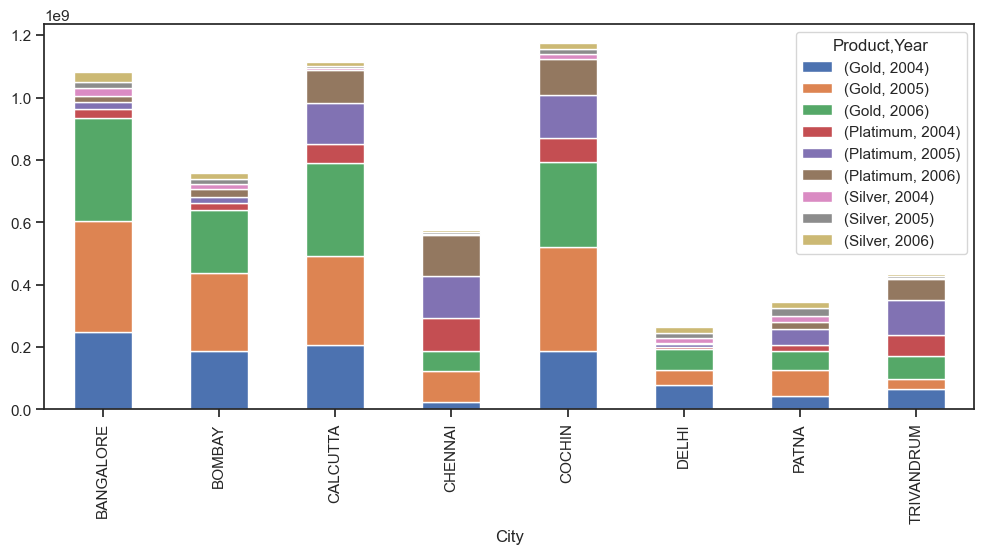

In [133]:
city_spend.plot(kind='bar', stacked=True, figsize=(12,5))

# 4. Create graphs for

# a. Monthly comparison of total spends, city wise

In [138]:
City_month_spend=Cust_spend_repay.groupby(['Month_No','City'])[['Amount']].sum().reset_index()

In [140]:
City_pivot=pd.pivot_table(data=City_month_spend, columns='Month_No',index='City', values='Amount', aggfunc='sum')

<Axes: xlabel='City'>

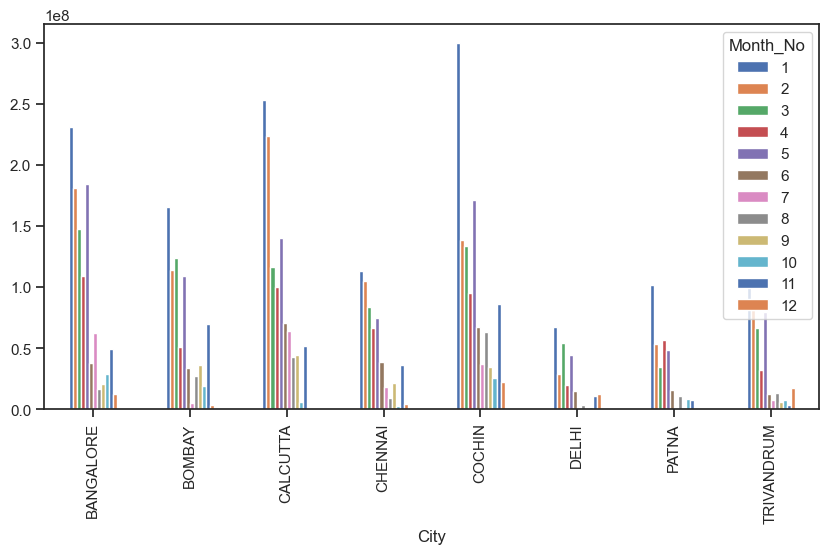

In [143]:
City_pivot.plot(kind='bar', figsize=(10,5))

# b. Comparison of yearly spend on air tickets

In [148]:
ticket_spend=Cust_spend_repay[Cust_spend_repay.Type=='AIR TICKET']

In [150]:
yearly_spend=ticket_spend.groupby(['Year','Type'])[['Amount']].sum().reset_index()

<Axes: xlabel='Year'>

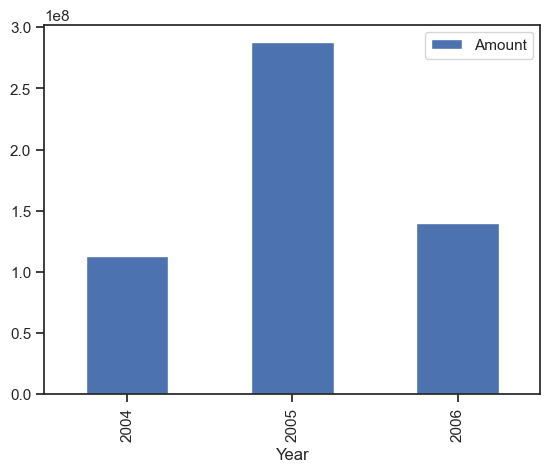

In [152]:
yearly_spend.plot(kind='bar', x='Year', y='Amount')

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [153]:
product_spend=Cust_spend_repay.groupby(['Month_No','Product'])[['Amount']].sum().reset_index()

In [157]:
product_spend=pd.pivot_table(data=product_spend, index='Product', columns='Month_No',values='Amount', aggfunc='sum')

<Axes: xlabel='Product'>

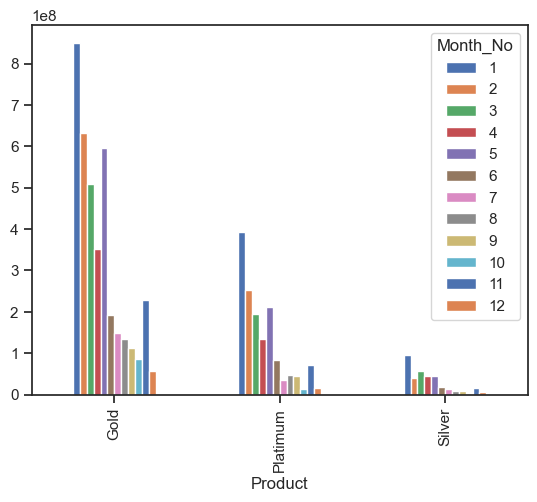

In [158]:
product_spend.plot(kind='bar')

# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [175]:
def find_10(product,time_period):
    if time_period=='Monthly':
        return Cust_spend_repay.loc[Cust_spend_repay.Product==product].groupby(['Customer','City','Product','Month_No'])[['Amount_repay']].sum().sort_values(by='Amount_repay', ascending=False).head(10)
    elif time_period=='Yearly':
        return Cust_spend_repay.loc[Cust_spend_repay.Product==product].groupby(['Customer','City','Product','Year'])[['Amount_repay']].sum().sort_values(by='Amount_repay', ascending=False).head(10)


In [180]:
product_cat= str(input("Please enter the product category you wish to check (is should be among Gold/Silver/Platinum):"))
time_periods= str(input("Please enter the time period (Monthly or Yearly): "))

Please enter the product category you wish to check (is should be among Gold/Silver/Platinum):Silver
Please enter the time period (Monthly or Yearly): Yearly


In [181]:
find_10(product_cat,time_periods)

Amount_repay
Customer City      Product Year              
A22      BOMBAY    Silver  2006      36482760
A46      PATNA     Silver  2005      34704397
A22      BOMBAY    Silver  2004      33442530
                           2005      30402300
A46      PATNA     Silver  2004      26695690
A23      BANGALORE Silver  2004      25379000
A25      COCHIN    Silver  2006      23979220
A24      DELHI     Silver  2006      22929500
                           2004      22929500
A23      BANGALORE Silver  2006      22841100

# Thank you!